<a href="https://colab.research.google.com/github/fboldt/aulasann/blob/main/aula07a_mnist_flat_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


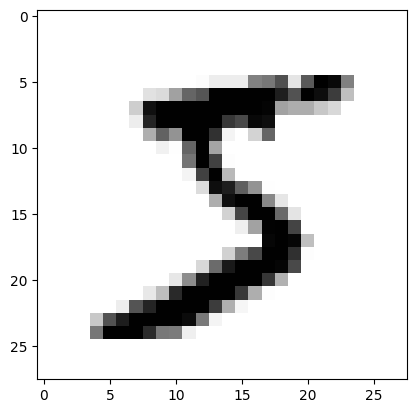

In [2]:
from matplotlib import pyplot as plt
digit = train_images[0]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [3]:
train_labels[0]

np.uint8(5)

In [12]:
import numpy as np
samples = np.random.randint(0,train_images.shape[0],9)
samples

array([54034, 14890, 45651, 57799,  5417, 46027, 12047, 59885, 41227])

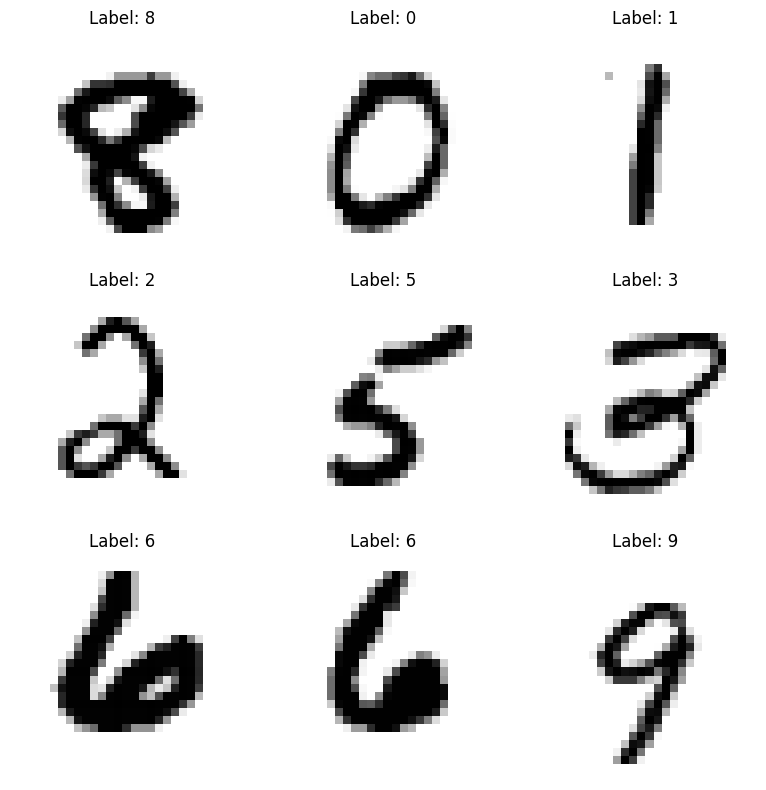

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
for i, sample_index in enumerate(samples):
    plt.subplot(3, 3, i + 1)
    plt.imshow(train_images[sample_index], cmap=plt.cm.binary)
    plt.title(f"Label: {train_labels[sample_index]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [14]:
train_flat_images = train_images.reshape((60000, 28 * 28))
test_flat_images = test_images.reshape((10000, 28 * 28))
print(train_flat_images.shape)

(60000, 784)


In [16]:
print(f"n_classes: {len(np.unique(train_labels))}")

n_classes: 10


In [22]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    train_flat_images,
    train_labels,
    epochs=5,
    batch_size=128
)

test_loss, test_acc = model.evaluate(test_flat_images, test_labels)
print(f"Test accuracy: {test_acc}")
print(f"Test loss: {test_loss}")

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8366 - loss: 17.0520
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9491 - loss: 0.7843
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9658 - loss: 0.4452
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9727 - loss: 0.3546
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9759 - loss: 0.3008
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9621 - loss: 0.7755
Test accuracy: 0.9664000272750854
Test loss: 0.6761635541915894


In [20]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score
import numpy as np

def BasicKerasNN(num_classes):
  return keras.Sequential([
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
  ])

class KerasWrappedNN(BaseEstimator, ClassifierMixin):
  def __init__(self, epochs=5, batch_size=128, model_fabric=BasicKerasNN):
    self.epochs = epochs
    self.batch_size = batch_size
    self.model_fabric = model_fabric

  def fit(self, X, y):
    self.labels, ids = np.unique(y, return_inverse=True)
    yhot = keras.utils.to_categorical(ids, len(self.labels))
    self.model = self.model_fabric(len(np.unique(y)))
    self.model.compile(
        optimizer='rmsprop',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    self.model.fit(
        X, yhot,
        epochs=self.epochs,
        batch_size=self.batch_size,
        verbose=0
    )
    return self

  def predict(self, X):
    y_proba = self.model.predict(X)
    return self.labels[np.argmax(y_proba, axis=1)]

model = KerasWrappedNN(epochs=5, batch_size=128)
model.fit(train_flat_images, train_labels)
y_pred = model.predict(test_flat_images)
accuracy_score(test_labels, y_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step


0.9506

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", KerasWrappedNN())
])

pipeline.fit(train_flat_images, train_labels)
y_pred = pipeline.predict(test_flat_images)
accuracy_score(test_labels, y_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step


/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


0.973

In [28]:
from sklearn.base import TransformerMixin

class Divide255(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    return self
  def transform(self, X):
    return X / 255.0

pipeline = Pipeline([
    ("scaler", Divide255()),
    ("model", KerasWrappedNN())
])

pipeline.fit(train_flat_images, train_labels)
y_pred = pipeline.predict(test_flat_images)
accuracy_score(test_labels, y_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


0.9742

In [29]:
class Shape2Flat(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    return self
  def transform(self, X):
    return X.reshape((-1, 28 * 28))

pipeline = Pipeline([
    ("shape2flat", Shape2Flat()),
    ("scaler", Divide255()),
    ("model", KerasWrappedNN())
])

pipeline.fit(train_images, train_labels)
y_pred = pipeline.predict(test_images)
accuracy_score(test_labels, y_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step


/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


0.976

In [30]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ("shape2flat", Shape2Flat()),
    ("scaler", Divide255()),
    ("model", RandomForestClassifier())
])

pipeline.fit(train_images, train_labels)
y_pred = pipeline.predict(test_images)
accuracy_score(test_labels, y_pred)

0.9691